In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [9]:
def prepare_data(target):
    iris = load_iris() # iris 데이터 로드
    X_tr = iris.data[:, 2:] # 4개의 특징 중 꽃잎의 길이와 폭만 선택
    labels = iris.target_names # 'setosa', 'versicolor', 'virginica' -> 0, 1, 2
    y = iris.target # 'setosa', 'versicolor', 'virginica' -> 0, 1, 2

    # 학습 표본의 레이블 지정, target에 지정된 레이블이면 1, 아니면 0
    y_tr = []
    for i in range(150) :
        y_tr.append(labels[y[i]] == target)
    y_tr = np.array(y_tr, dtype=int)
    return X_tr, y_tr, ['(1) ' + target, '(0) the others'] # [] : 범례로 사용할 문자열

In [3]:
iris=load_iris()
print(len(iris.data))

150


##### step function

In [5]:
def step(x):
    return int(x >= 0)

#### **퍼셉트론 클래스 선언**

In [6]:
class Perceptron():
    def __init__(self, dim, activation):
        rnd = np.random.default_rng() # 난수 발생기 생성
        self.dim = dim
        self.activation = activation
        # 가중치(w)와 바이어스(b)를 He normal 방식으로 초기화
        self.w = rnd.normal(scale = np.sqrt(2.0 / dim), size=dim) # He normal : 난수발생기를 이용하여 정규분포로 초기화
        self.b = rnd.normal(scale = np.sqrt(2.0 / dim))
    
    def printW(self):
        for i in range(self.dim):
            print('  w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('  b = {:6.3f}'.format(self.b))

    def predict(self, x):  # "numpy 배열 x"에 저장된 표본의 출력 계산
        return np.array([self.activation(np.dot(self.w, x[i]) + self.b)
                          for i in range(len(x))])

        # np.dot() : 두 배열의 내적곱을 계산

    def fit(self, X, y, N, epochs, eta=0.01):
        # 학습표본의 인덱스를 무작위 순서로 섞음
        idx = list(range(N))
        np.random.shuffle(idx)
        X = np.array([X[idx[i]] for i in range(N)])
        y = np.array([y[idx[i]] for i in range(N)])

        f = 'Epochs = {:4d}    Loss = {:8.5f}'
        print('w의 초깃값  ', end='')
        self.printW()
        for j in range(epochs):
            for i in range(N):
                # x[i]에 대한 출력 오차 계산
                delta = self.predict([X[i]])[0] - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            # 학습 과정 출력
            if j < 10 or (j+1) % 100 == 0:
                loss = self.predict(X) - y
                loss = (loss * loss).sum() / N
                print(f.format(j+1, loss), end='')
                self.printW()

#### 보충학습 : He normal

"HE Normal"은 딥러닝에서 사용하는 가중치 초기화 방법 중 하나로, He 초기화(He Initialization)라고도 한다. 이 초기화 방법은 주로 ReLU(ReLU, Leaky ReLU 등) 계열의 활성화 함수를 사용할 때, 신경망의 학습을 안정적으로 시작하기 위해 설계되었다.

##### He 초기화의 핵심 개념

1. **가중치 초기화 방법**: He 초기화는 각 층의 가중치를 특정 분포에 따라 무작위로 설정한다다. 이를 통해 신경망의 각 뉴런이 균일하게 학습을 시작할 수 있도록 도와준다.

2. **분포**: He 초기화는 가중치를 평균이 0이고, 표준 편차가 $\sqrt{\frac{2}{n}}$인 정규 분포(가우시안 분포)에서 샘플링한다. 여기서 $n$은 이전 층의 뉴런 개수를 의미한다.

   - 수식으로 표현하면, 가중치는 다음과 같이 초기화된다:
     $$
     W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n}}\right)
     $$
   - 또는, 정규분포가 아니라 유니폼 분포를 사용할 때는 다음과 같이 초기화할 수도 있다:
     $$
     W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n}}, \sqrt{\frac{6}{n}}\right)
     $$

3. **목적**: 이 방법은 신경망의 층이 깊어질수록 발생할 수 있는 **기울기 소실(Vanishing Gradient)** 문제를 완화하기 위해 설계되었다. 가중치를 적절하게 초기화함으로써, 역전파 시 기울기(Gradient)가 층을 지날 때 너무 작아지거나 커지지 않도록 조절할 수 있는 것이다.

##### 왜 He 초기화인가?

He 초기화는 주로 ReLU 계열의 활성화 함수를 사용하는 네트워크에 적합하다. ReLU 활성화 함수는 음수 값을 모두 0으로 만들어버리기 때문에, 잘못된 가중치 초기화로 인해 네트워크가 학습을 전혀 하지 못하는 상황이 발생할 수 있다. He 초기화는 이러한 문제를 방지하고, 학습 초기부터 신경망이 더 안정적이고 빠르게 수렴할 수 있도록 돕게 된다.

##### 관련 초기화 방법

- **Xavier 초기화**: Sigmoid, Tanh와 같은 활성화 함수에서 주로 사용되는 초기화 방법으로, He 초기화와 비슷하지만 분포의 표준 편차가 $\sqrt{\frac{1}{n}}$다.

In [7]:
def visualize(net, X, y, multi_class, labels, class_id, colors, 
               xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 0.05 간격의 좌표값으로 나열
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
    y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)
    
    # x_lin과 y_lin의 격자좌표의 x와 y 값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)
    
    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])
    
    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k])
                            for k in range(len(y_hat))], dtype=int)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))
    
    # 출력할 그래프의 수평/수직 범위 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                     c = c, s = 5, alpha = 0.3, edgecolors = 'none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1],
                     c = c, s = 20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()


In [10]:
nSamples = 150
nDim = 2
target = 'setosa'
X_tr, y_tr, labels = prepare_data(target)

In [11]:
p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, nSamples, epochs=1000, eta=0.01)

w의 초깃값    w1 =  0.513  w2 =  0.483  b = -0.970
Epochs =    1    Loss =  0.33333  w1 = -0.011  w2 =  0.154  b = -0.700
Epochs =    2    Loss =  0.33333  w1 =  0.015  w2 =  0.043  b = -0.320
Epochs =    3    Loss =  0.15333  w1 =  0.017  w2 = -0.063  b = -0.010
Epochs =    4    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =    5    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =    6    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =    7    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =    8    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =    9    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =   10    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  100    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  200    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  300    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050


Epochs =  400    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  500    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  600    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  700    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  800    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs =  900    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050
Epochs = 1000    Loss =  0.00000  w1 =  0.004  w2 = -0.084  b =  0.050


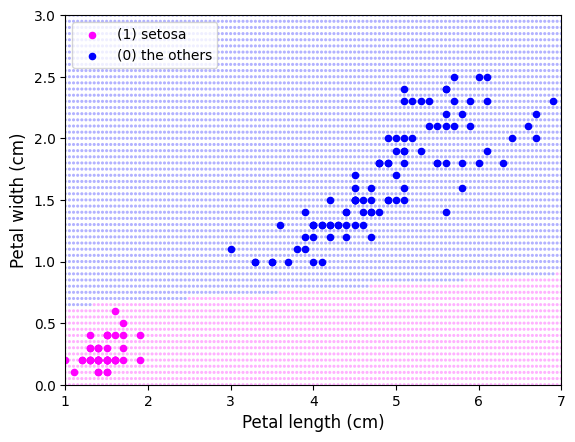

In [12]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='Petal length (cm)',
          ylabel='Petal width (cm)',
          legend_loc='upper left')